In [1]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

# Wind power and energy system

Results vindkraft  project (KLIV).<br>
Here the most important results and figures are shown. They might be used for an article or for the final project report.
The following is shown in this notebook:

#### TOC
1. Low Power Periods (LPP)<br>
2. Full Load Hours (FLH)<br>
3. Weather Regimes<br>
    3.1 demonstration of weather regimes<br>
    3.2 change of weather regimes in a warmer climate
    

Most of the following data has been generated with the Global Energy GIS (GEGIS) package by Niclas Mattson. (_https://github.com/niclasmattsson/GlobalEnergyGIS_) <br> A publication describing the package is available in the same folder as this jupyter notebook or online _https://www.sciencedirect.com/science/article/pii/S2211467X20301590_.
    
    
The energy system model is provided by Lisa Göransson, Energiteknik, Chalmers (lisa.goransson@chalmers.se).
All parameters that are set inside the model as costs,Hydro resource, model equations can be obtained by asking Lisa. Some are listed in the Latex report that is linked to this folder.



In [2]:
from lib.init import *
import lib.helpers as h
GAMSregions = h.get_GAMSregions()
# Note, the GAMS regions here are defined as done at Energiteknik Chalmers (lisa.goransson@chalmers.se). 
# For plots one might want to change order.


### Wind power time series

The following plotted time series are used as input to the energy system model. 
The following time series are available for the time period 1999-2007 and for the different el regions:
* wind onshore (5 wind classes)
* wind offshore (1 wind class)
* solar power (roof top, solar power plant A and B)
* demand profile

In [3]:
datainfo = {
    "region"      : "scand_gams", #"Europe13"
    "year"        : "2003",
    "model"       : "ERA5",     #"CORDEX_ictp_EC-EARTH"  #"HCLIM_EC-EARTH"
    "scenario"    : "historical",                #rcp85
    "modelyear"   : "",
    "SP"          : "200",}

repryears = [2000,2012,2003]
#years = np.arange(1999,2007)

(1, 10, 8760)
#class  #region  #timesteps


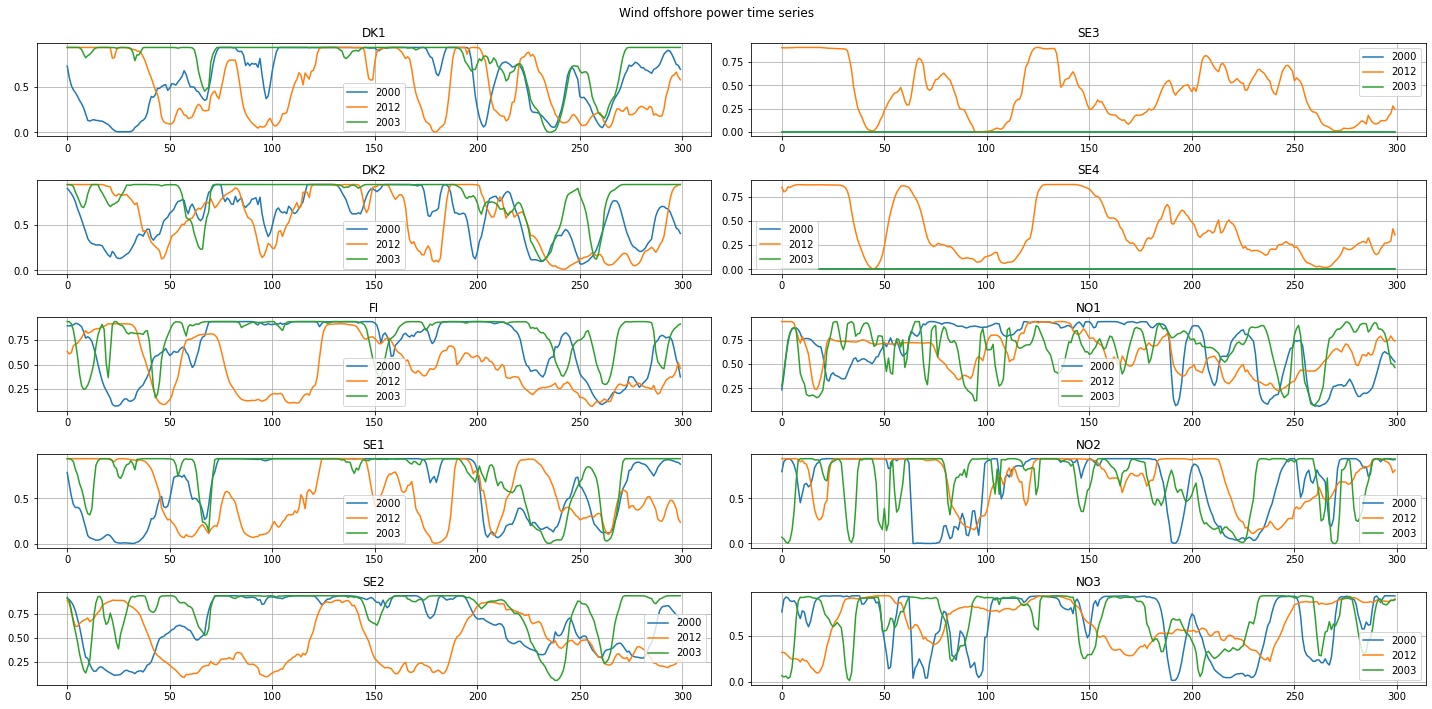

In [4]:
# Wind Offshore

wttype = "CFtime_windoffshore" # Choices: onshore: "CFtime_windonshoreA" and offshore: "CFtime_windoffshore"
fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("Wind offshore power time series") 

for y in repryears:
    datainfo['year'] = y
    f        = "GISdata_{}wind{}_{}.pkl". \
            format(datainfo['SP'],datainfo['year'],datainfo['region'])
    obj = h.load_object(h.winddatapath + f)   
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        profile = obj[wttype][0,reg_i,:]
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[300:600])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].grid(True)
        ax[j,k].legend(list(repryears))
        j+=1

        if j==5:
            j=0
            k=1
    
fig.tight_layout()
fig.savefig(h.plotpath + "WOFF_timeseries.png", dpi =300)

print(obj[wttype].shape)
print("#class  #region  #timesteps")

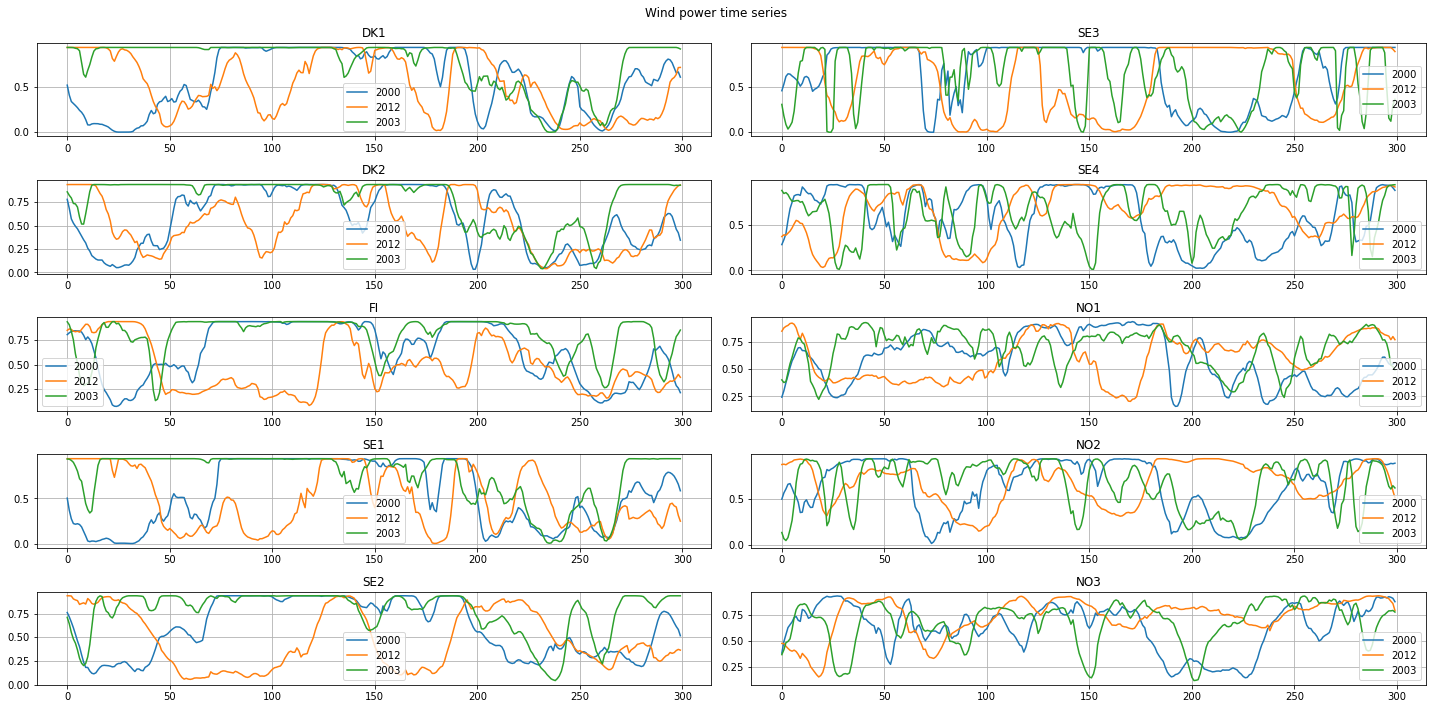

In [5]:
# Wind Onshore

wttype = "CFtime_windonshoreA" 
fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("Wind power time series") 

for y in repryears:
    f        = "GISdata_200wind{}_scand_gams.pkl". \
            format(y)
    obj = h.load_object(h.winddatapath + f)   
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        profile = obj[wttype][-1,reg_i,:]
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[300:600])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].grid(True)
        ax[j,k].legend(list(repryears))
        j+=1

        if j==5:
            j=0
            k=1
fig.tight_layout()
fig.savefig(h.plotpath + "WON_timeseries.png", dpi =300)

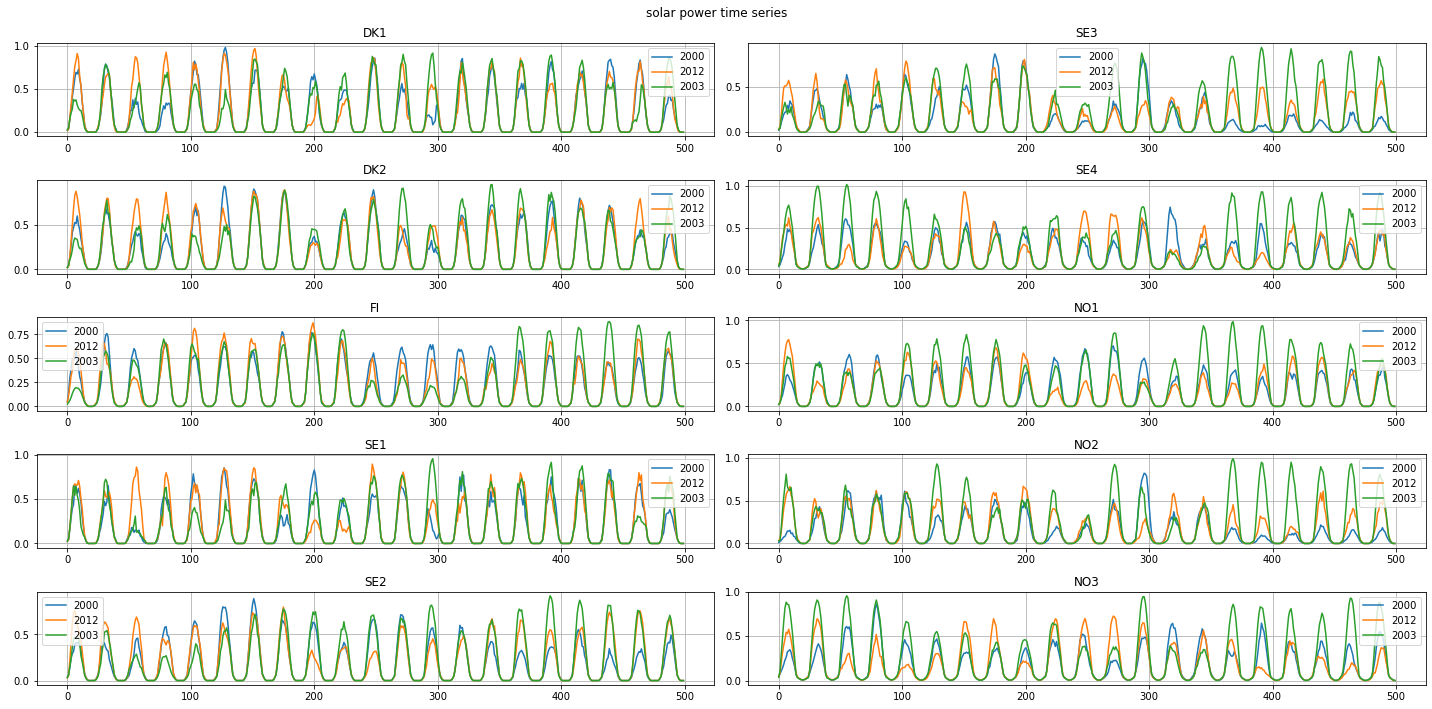

In [6]:
# Photovoltaic

fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("solar power time series") 
re = "CFtime_pvplantA"   # "CFtime_pvplantA" or "CFtime_pvrooftop" 
for y in repryears:
    datainfo['year'] = y
    f        = "GISdata_solar{}_{}.pkl". \
            format(datainfo['year'],datainfo['region'])
    obj = h.load_object(h.solardatapath + f)   
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        profile = obj[re][-1,reg_i,:]
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[4300:4800])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].grid(True)
        ax[j,k].legend(list(repryears))
        j+=1

        if j==5:
            j=0
            k=1
fig.tight_layout()

fig.savefig(h.plotpath + "{}.png".format(re), dpi =300)

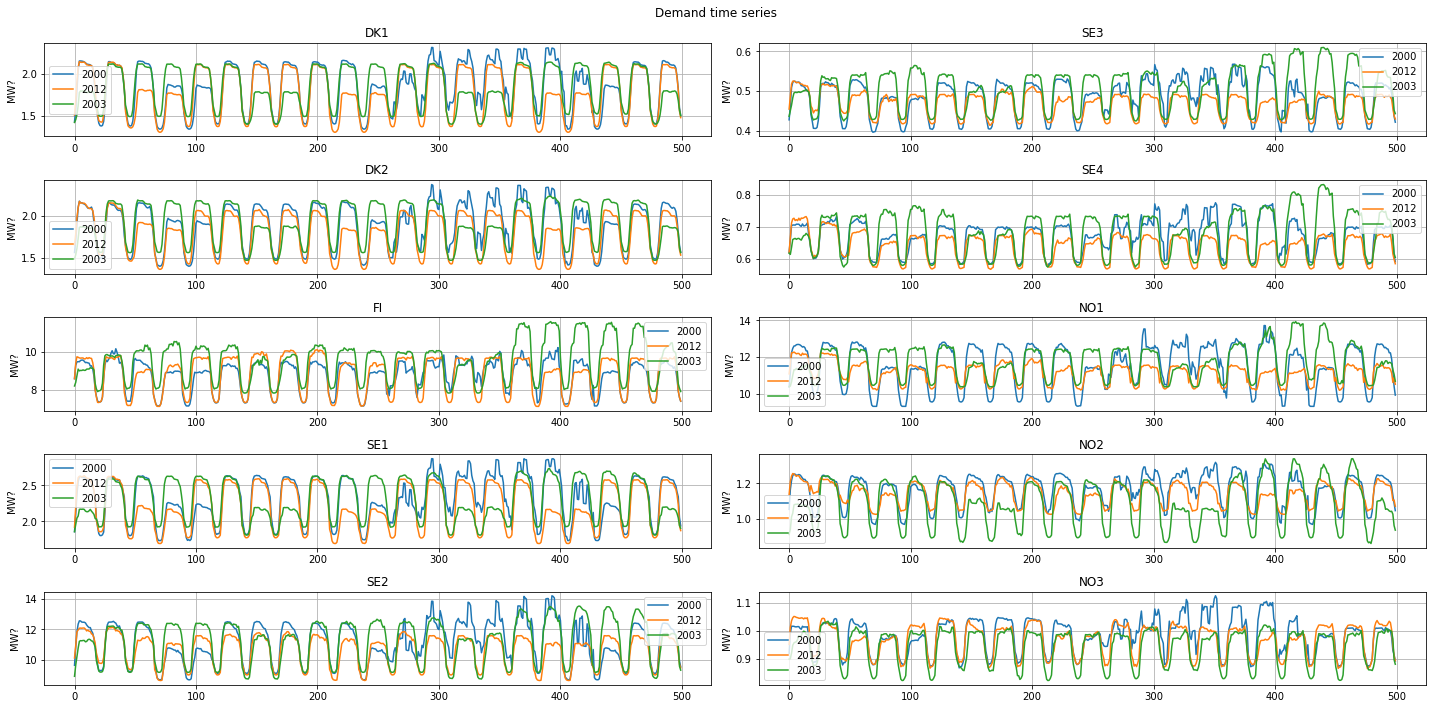

In [7]:
# Demand 

fig,ax = plt.subplots(5,2, figsize=(20,10))
fig.suptitle("Demand time series") 
re = "profile"
for y in repryears:
    datainfo['year'] = y
    f        = "SyntheticDemand_scand_gams_ssp2-26-2020_{}.pkl".\
            format(y)
    obj = h.load_object(h.demanddatapath + f)  
    j=0; k=0
    for reg_i,reg in enumerate(GAMSregions.keys()):
        tot_demand = obj['tot'][reg_i]
        profile = obj[re][reg_i,:]*tot_demand*1e3
        s=np.isnan(profile)
        profile[s]=0.0
        ax[j,k].plot(profile[4300:4800])
        #ax[j,k].legend(['1','2','3','4','5'])
        ax[j,k].set_title(reg)
        ax[j,k].set_ylabel('MW?')
        ax[j,k].grid(True)
        ax[j,k].legend(list(repryears))
        j+=1

        if j==5:
            j=0
            k=1
fig.tight_layout()
fig.savefig(h.plotpath + "demand.png", dpi =300)

## Wind power indicators for different data sets

Data sets:<br>
* ERA5 (1999-2018)<br>
* HCLIM historical (1985-2005) <br>
* HCLIM future scenario (2040-2060) <br>

Wind power indicators computed from the annual 3-hourly time series
* Full Load Hours (FLH)
* Low power periods (LPP)
* Zero Power days (ZPD)

plots display mean and confidence interval of all indicators for each electricity region 

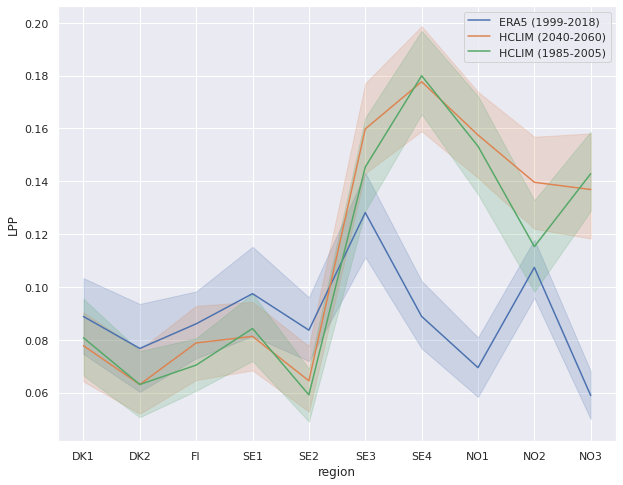

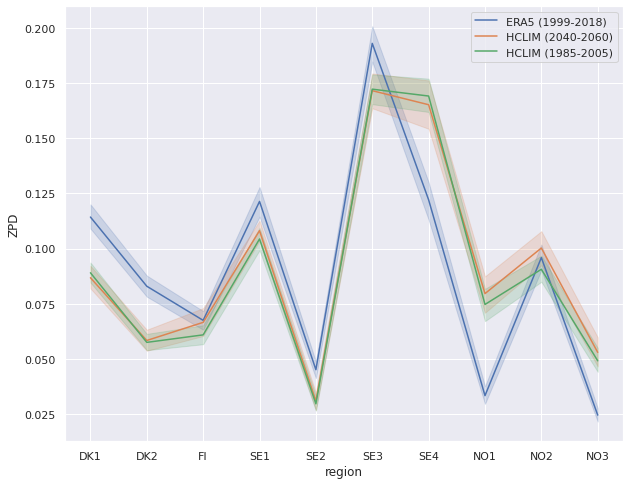

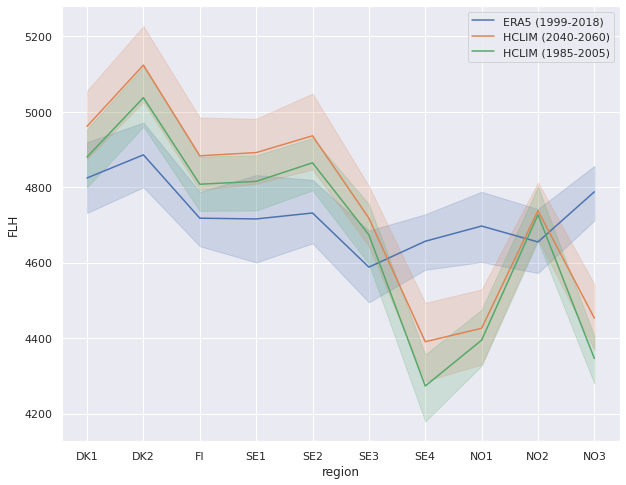

In [8]:
# plot different data sets as line plot. Scientifically not correct, I know. 
# Years for each data set are different, 
# only meant for showing the different means and the different confidence intervals

sns.set(rc={'figure.figsize':(10,8)})
# Load data frames of different data sets
ERA5_DF   = h.load_object(h.inddatapath + "ERA5_DF_1999_2018.pkl")
HC_DF     = h.load_object(h.inddatapath + "HCLIM_DF_2040_2060.pkl")
HChist_DF = h.load_object(h.inddatapath + "HCLIM_hist_DF_1985_2005.pkl")

fig = plt.figure()
ax = sns.lineplot(data = ERA5_DF, x = 'region',y = 'LPP',
                              label="ERA5 (1999-2018)",)
ax = sns.lineplot(data = HC_DF, x = 'region', y = 'LPP',
                            label="HCLIM (2040-2060)")
ax = sns.lineplot(data = HChist_DF, x = 'region', y = 'LPP',
                            label="HCLIM (1985-2005)")
ax.legend()
fig.savefig(h.plotpath + "LPP_per_region.png", dpi =300)
fig.show()

fig = plt.figure()

ax = sns.lineplot(data = ERA5_DF, x = 'region', y = 'ZPD',
                             label="ERA5 (1999-2018)")
ax = sns.lineplot(data = HC_DF, x = 'region', y = 'ZPD',
                            label="HCLIM (2040-2060)")
ax = sns.lineplot(data = HChist_DF, x = 'region', y = 'ZPD',
                            label="HCLIM (1985-2005)")
ax.legend()
fig.savefig(h.plotpath + "ZPD_per_region.png", dpi =300)
fig.show()

fig = plt.figure()

ax = sns.lineplot(data = ERA5_DF, x = 'region', y = 'FLH',
                             label="ERA5 (1999-2018)")
ax = sns.lineplot(data = HC_DF, x = 'region', y = 'FLH',
                            label="HCLIM (2040-2060)")
ax = sns.lineplot(data = HChist_DF, x = 'region', y = 'FLH',
                            label="HCLIM (1985-2005)")
ax.legend()
fig.savefig(h.plotpath + "FLH_per_region.png", dpi =300)
fig.show()

Boxplots that show the variability of FLHs and LPPs for different regions and years. An illustration that shows the impact of  different renewable energy resource data on the final optimal result.


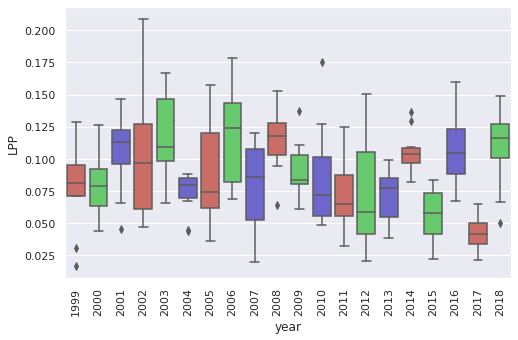

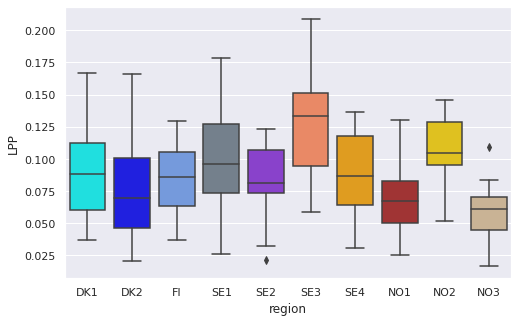

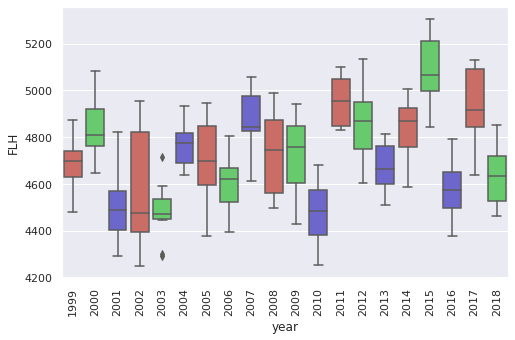

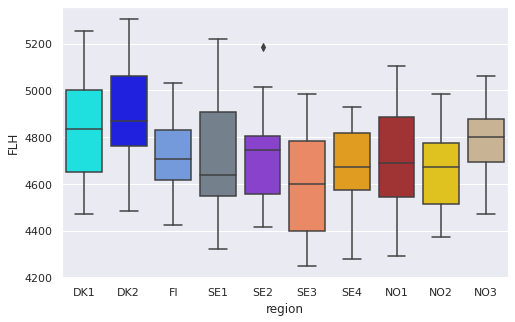

In [9]:
sns.set(rc={'figure.figsize':(8,5)})

repryears = [2000,2012,2003]

pal_reg =list(h.reg_colors().values()) 
pal = sns.color_palette("hls", len(repryears))

data = ERA5_DF[ERA5_DF["year"].isin(repryears)]
dataSE = data[data["region"].isin(['SE1','SE2','SE3','SE4'])]

# Plot LPP per year, confidence inteval over all regions
fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'year',y = 'LPP', palette=pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.savefig(h.plotpath + "LPP_per_year_allregions_ERA5_boxplot.png", dpi =300)
fig.show()

# Plot LPP per region, confidence inteval over all years
fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'region',y = 'LPP',palette=pal_reg)
fig.savefig(h.plotpath + "LPP_per_region_allyears_ERA5_boxplot.png", dpi =300)
fig.show()

# Plot FLH per year, confidence inteval over all regions
fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'year',y = 'FLH',palette=pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.savefig(h.plotpath + "FLH_per_year_allregions_ERA5_boxplot.png", dpi =300)
fig.show()

# Plot FLH per region, confidence inteval over all years
fig = plt.figure()
ax = sns.boxplot(data = ERA5_DF, x = 'region',y = 'FLH',palette=pal_reg)
fig.savefig(h.plotpath + "FLH_per_region_allyears_ERA5_boxplot.png", dpi =300)
fig.show()


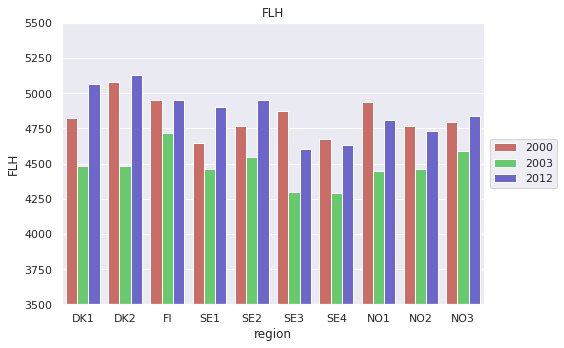

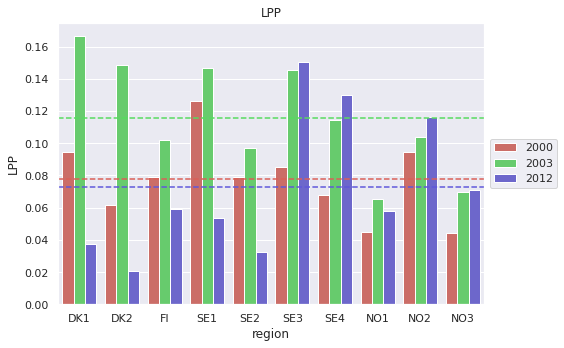

In [10]:
# Bar plot of FLH and LPP for chosen representative years, to show differences in more detail

fig = plt.figure()
ax = sns.barplot(data = data, x = 'region', y = 'FLH', hue = 'year', palette=pal)
#[ax.axhline(y=i, linestyle='--',  c=c) for i,c in zip(data.groupby(['year']).mean()['FLH'].values,pal)]
plt.title('FLH')
plt.ylim([3500,5500])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
fig.savefig(h.plotpath + "FLH_per_region_ERA5_barplot.png", dpi =300)
fig.show()

fig = plt.figure()
ax = sns.barplot(data = data, x = 'region', y = 'LPP', hue = 'year',palette=pal)
[ax.axhline(y=i, linestyle='--',  c=c) for i,c in zip(data.groupby(['year']).mean()['LPP'].values,pal)]
plt.title('LPP')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), )
plt.tight_layout()
fig.savefig(h.plotpath + "LPP_per_region_ERA5_barplot.png", dpi =300)
fig.show()

## Energy system plots

In the following the time series that have shown above are used as input into the energy system model. The model is a investment and dispatch optimization model with the objective to minimize the total annual energy costs.
The results are shown for a number of different years.

Most interesting is the capacity installed, that is why this is the only variable plotted in this notebook.

The technologies part of the producing optimal solution are:
* Wind onshore: the following are part of that:<br>
    * WON5 wind power of wind class 5 (highest wind class)<br>
    * WON4: wind power of wind class 4 <br>
    * WON3 wind power of wind class 3 <br>
* Hydro:  the following are part of that: <br>
    * RO: pump hydro <br>
    * RR: river hydro <br>
* WG_peak: gas turbine  <br>
* PV: the following ar part of that:<br>
    * PVA1: photovoltaic power plants <br>
    * PVB1 photovoltaic power plants<br>
    * PVR1 photovoltaic roof top <br>
    
    
**NOTE** that wind offshore is also part of the model but has not been chosen by the optimizer as the technology is more expensive than onshore, and the parameter that defnies  onshore availability and exceptence was set to a high value. That means a lot of onshore capacity was available for the model runs

In [11]:
#from compare_energyyears import *
repryears = [2000,2012,2003]
#x    = list(years)
plt.close('all')

GAMSregions = h.get_GAMSregions()
colors      = h.reg_colors()


dfs = {}

#for year in repryears:
for year in np.arange(1995,2019):
    filename    = "ERA5_lowFlex_H2store_{}_{}_200d10_3h".format(year,year)
    if os.path.exists(h.GAMSdatapath+filename+".pkl"):
        dfs[year]       = h.load_object(h.GAMSdatapath+filename+".pkl")
    else: print("Sorry, file {} did not get modelled and does not exist".format(year))

gamsyears = list(dfs.keys())
print(gamsyears)

Sorry, file 1995 did not get modelled and does not exist
Sorry, file 1996 did not get modelled and does not exist
Sorry, file 1997 did not get modelled and does not exist
Sorry, file 1998 did not get modelled and does not exist
Sorry, file 2006 did not get modelled and does not exist
Sorry, file 2014 did not get modelled and does not exist
Sorry, file 2017 did not get modelled and does not exist
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2018]


In [12]:
# A pandas data frame is created including the installed capacity per region and year

columns = ['year', 'technology', 'region', 'country', 'capacity']


capdf = pd.DataFrame(columns = ['year', 'region', 'country', 'technology', 'capacity'])
for y,i in dfs.items():
    for reg in GAMSregions.keys():
        cap    = i['o_capacity']
        cap    = cap[cap.value>0]
        cap.drop(cap[cap['tech']=='Tank_heat'].index, inplace =True)
        cap.drop(cap[cap['tech']=='bat_cap'].index, inplace=True)
        cap.drop(cap[cap['tech']=='bat'].index, inplace=True)
        cap.drop(cap[cap['tech']=='H2store'].index, inplace=True)
        cap.reset_index()
        year   = pd.Series(y,   index=range(cap.shape[0]))
        I_reg  = pd.Series(cap['I_reg'])
        tech   = pd.Series(cap['tech'])
        value  = pd.Series(cap['value'])
        frame = {'year':year, 'region':I_reg, 'country':I_reg, 'technology':tech, 'capacity':value}
        df_i  = pd.DataFrame(frame)
        capdf   = pd.concat([capdf, df_i],ignore_index=True)

capdf = capdf.astype({'region':'str'})
for k in ["SE1","SE2", "SE3","SE4"]:
    capdf.loc[capdf["country"] == k, "country"] = "SE"
for k in ["DK1","DK2"]:
    capdf.loc[capdf["country"] == k, "country"] = "DK"
for k in ["NO1", "NO2", "NO3"]:
    capdf.loc[capdf["country"] == k, "country"] = "NO"

# We divide the installed capacities into technologies that 
# - consume energy (capconsume)  and 
# - produce energy (capdf)
capconsume= capdf[capdf["technology"].isin(["HP","EB","electrolyser"])]
capdf= capdf[~capdf["technology"].isin(["HP","EB","electrolyser"])]

## Plots Scandinavia 

At first all the capacities get aggregated for whole Scandinavia and the installed capacities are displayed for the representative years

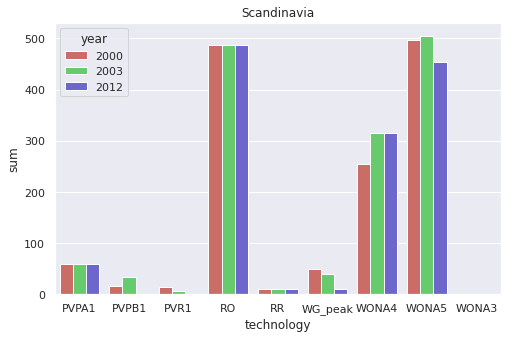

In [13]:
# Compute total capacity for Scandinavia (DF: capScandsum)
capScandsum = capdf.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()

ax = sns.barplot(data=capScandsum[capScandsum["year"].isin(repryears)], 
                 x='technology', y = 'sum', hue='year',palette=pal)
plt.title('Scandinavia')
fig.show()
plt.savefig(h.plotpath + "Scandinavia_installed_cap.png".format(reg), dpi =300)



The following Stackplot  shows the installation of all producing technologies.
All years that have been modelled in the energy system are included.

Note that: Photovoltaic technologies get aggregated to one technology, as does Hydro technologies.


<Figure size 720x432 with 0 Axes>

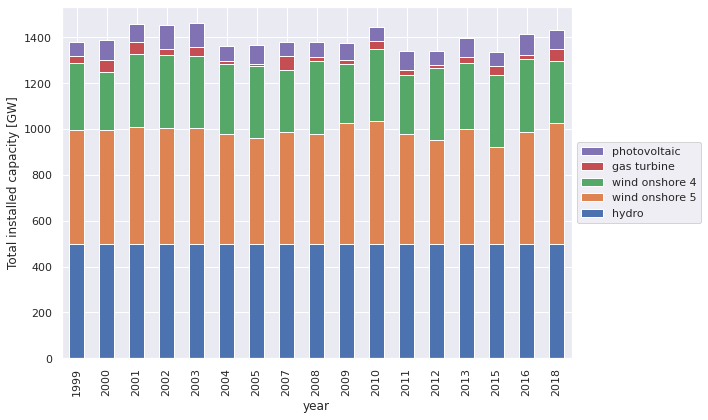

In [14]:

sns.set(rc={'figure.figsize':(10,6)})
plt.figure()
#reorganize data so that stackplot can be plotted
totcap = capScandsum.pivot(index='year', columns='technology', values='sum')
# aggregate to one PC column
totcap['PV']= totcap[["PVPA1", "PVPB1", "PVR1"]].sum(axis=1)
# aggregate to  one Hydro column
totcap['Hydro']= totcap[["RR", "RO"]].sum(axis=1)
totcap = totcap[["Hydro", "WONA5", "WONA4", "WG_peak", "PV"] ]

#totcapScand = totcapScand.div(totcapScand.sum(1), axis=0)
ax=totcap.plot(kind='bar', stacked=True)
handles, labels = ax.get_legend_handles_labels()
labels = ['photovoltaic', 'gas turbine', 'wind onshore 4', 'wind onshore 5', 'hydro']
ax.legend(handles[::-1], labels, loc='center left', bbox_to_anchor=(1, 0.5), )
plt.ylabel('Total installed capacity [GW]')
plt.tight_layout()
plt.savefig(h.plotpath + "installedcap_compared.png".format(reg), dpi =300)
fig.show()

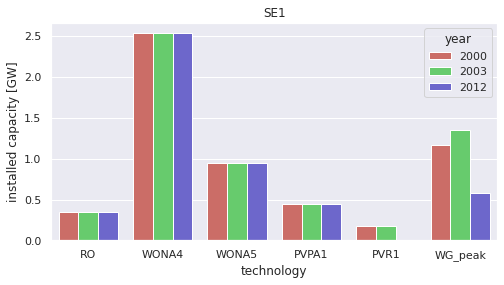

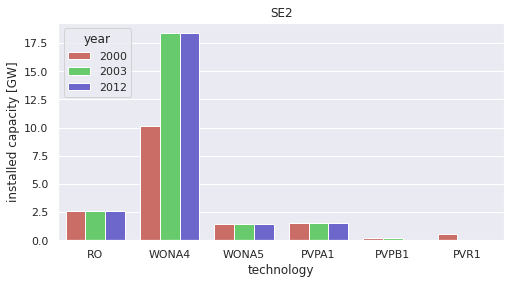

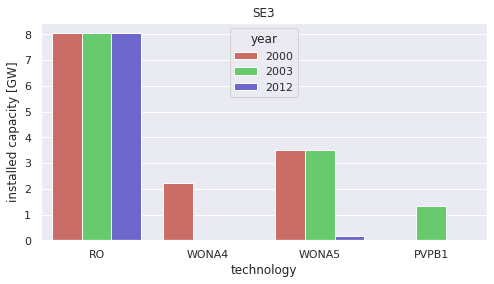

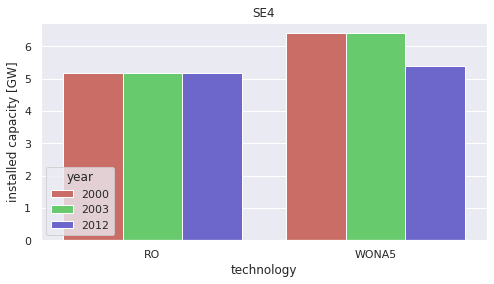

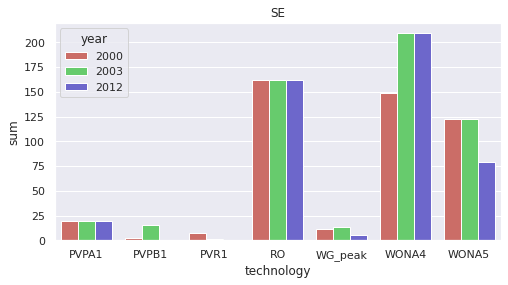

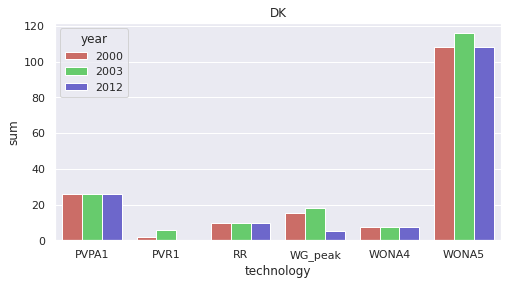

In [15]:
sns.set(rc={'figure.figsize':(8,4)})
pal = sns.color_palette("hls", len(repryears))
# Create capdf_sub that only includes repryears
capdf_sub = capdf[capdf["year"].isin(repryears)]

for area in ["SE1", "SE2", "SE3", "SE4"]:
    plt.figure()
    capSE1 = capdf_sub[capdf_sub['region']==area]
    ax = sns.barplot(data=capSE1, x = 'technology', y='capacity', hue='year',palette=pal)
    plt.title(area)
    plt.ylabel('installed capacity [GW]')
    plt.savefig(h.plotpath + "{}_installed_cap.png".format(area), dpi =300)
    fig.show()


area = "SE"
plt.figure()
capSE    = capdf_sub[capdf_sub['country']==area]
capSEsum = capSE.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()
ax = sns.barplot(data=capSEsum, x='technology', y = 'sum', hue='year',palette=pal)
plt.title(area)
plt.savefig(h.plotpath + "{}_installed_cap.png".format(area), dpi =300)
fig.show()

area = "DK"
plt.figure()
capDK    = capdf_sub[capdf_sub['country']==area]
capDKsum = capDK.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()
ax = sns.barplot(data=capDKsum, x='technology', y = 'sum', hue='year',palette=pal)
plt.title(area)
plt.savefig(h.plotpath + "{}_installed_cap.png".format(area), dpi =300)
fig.show()


In [16]:
print("total wind in Sweden for example years")
for y in repryears:
    tot = capSEsum[(capSEsum['year']==y) & (capSEsum['technology']=='WONA4' )]['sum'].values  + \
            capSEsum[(capSEsum['year']==y) & (capSEsum['technology']=='WONA5' )]['sum'].values 
    print('Total wind cap in year {} : {}'.format(y,tot))

print("total wind in Scandinavia for example years")
for y in  repryears:
    tot = capScandsum[(capScandsum['year']==y) & (capScandsum['technology']=='WONA4' )]['sum'].values  + \
            capScandsum[(capScandsum['year']==y) & (capScandsum['technology']=='WONA5' )]['sum'].values 
    print('Total wind cap in year {} : {}'.format(y,tot))
         

total wind in Sweden for example years
Total wind cap in year 2000 : [271.53538918760614]
Total wind cap in year 2012 : [288.2959076945775]
Total wind cap in year 2003 : [331.7621]
total wind in Scandinavia for example years
Total wind cap in year 2000 : [752.3671196459936]
Total wind cap in year 2012 : [769.9268269210162]
Total wind cap in year 2003 : [820.8362463160472]


#### Total system costs for all available years. 
Dependent on the resource availability different amount of technology gets installed which results in different system costs. Also power lines, Operation and maintanance, .. are part of the total costs.

In [17]:

for y in gamsyears:
    print(y, ': total costs ', dfs[y]['o_cost_total']['value'].values)
    

1999 : total costs  [11.65722125]
2000 : total costs  [11.57990851]
2001 : total costs  [12.2707576]
2002 : total costs  [12.15489768]
2003 : total costs  [12.22293905]
2004 : total costs  [11.44896894]
2005 : total costs  [11.46754391]
2007 : total costs  [11.69951602]
2008 : total costs  [11.82569838]
2009 : total costs  [11.91910894]
2010 : total costs  [12.41573214]
2011 : total costs  [11.24364465]
2012 : total costs  [11.33336478]
2013 : total costs  [11.76920169]
2015 : total costs  [11.11755123]
2016 : total costs  [11.79368779]
2018 : total costs  [12.13313079]


The different modeled years show differences in the share of wind energy as a part of the total electricity production.<br>
One can see that except for some extreme years the share of electriciy is around 0.8 for all years. This means the type of technolgoy installed is not as sensitive with respect to different weathers. instead the needed capacity  to meet the demand gets adapted to the available resource. <br>
Looking more detailed to the different regions, one can see that the installations get moved around between the regions.


In [18]:
pal = sns.color_palette("hls", len(gamsyears))

elshare_df = pd.DataFrame(columns = ['year', 'region', 'country', 'VREshare', 'windshare', 
                                    'windVREshare'])
for y,i in dfs.items():
    #or reg in GAMSregions.keys():
    VREshare     = i['o_VRE_share']
    windshare    = i['o_wind_share']
    year   = pd.Series(y, index=range(10))
    I_reg  = pd.Series(VREshare['I_reg'])
    windshare_value  = pd.Series(windshare['value'])
    VREshare_value   = pd.Series(VREshare['value'])
    windVREshare_val = windshare['value']/VREshare['value']
    frame = {'year':year, 'region':I_reg, 'country':I_reg, 'VREshare':VREshare_value, 'windshare':windshare_value, 'windVREshare':windVREshare_val}
    df_i  = pd.DataFrame(frame)
    elshare_df   = pd.concat([elshare_df, df_i],ignore_index=True)

elshare_df = elshare_df.astype({'region':'str'})
for k in ["SE1","SE2", "SE3","SE4"]:
    elshare_df.loc[elshare_df["country"] == k, "country"] = "SE"
for k in ["DK1","DK2"]:
    elshare_df.loc[elshare_df["country"] == k, "country"] = "DK"
for k in ["NO1", "NO2", "NO3"]:
    elshare_df.loc[elshare_df["country"] == k, "country"] = "NO"

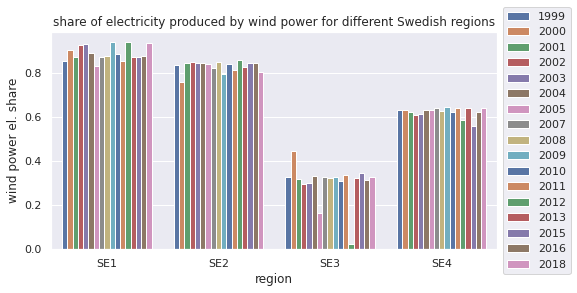

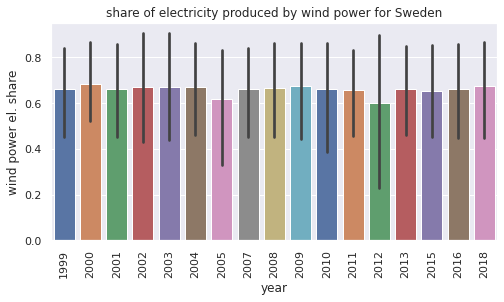

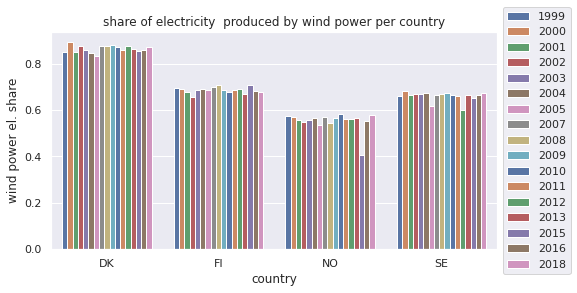

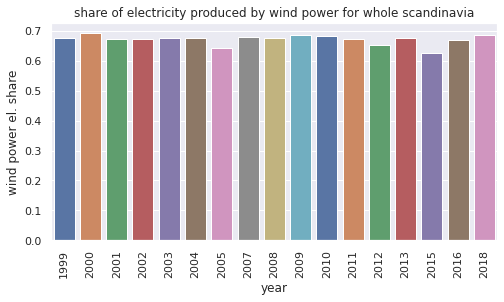

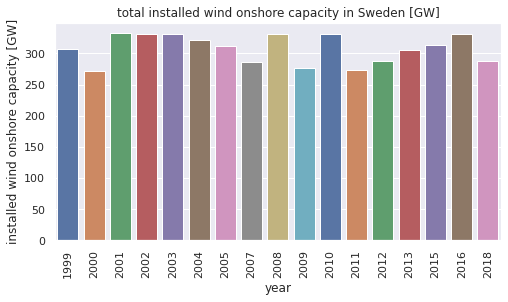

In [21]:
elshare_SE_df=elshare_df[elshare_df["region"].isin(["SE1", "SE2", "SE3", "SE4"])]

ax = sns.barplot(data=elshare_SE_df, x="region", y="windshare", hue="year", palette = sns.color_palette())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('share of electricity produced by wind power for different Swedish regions')
plt.ylabel('wind power el. share')
plt.savefig(h.plotpath + "wind_elshare_regions.png".format(area), dpi =300)

plt.figure()
ax = sns.barplot(data=elshare_SE_df, x="year", y="windshare", palette = sns.color_palette())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('share of electricity produced by wind power for Sweden')
plt.ylabel('wind power el. share')
plt.savefig(h.plotpath + "wind_elshare_Sweden.png".format(area), dpi =300)

plt.figure()
ax = sns.barplot(data=elshare_df, x="country", y="windshare", hue="year", ci = None, palette = sns.color_palette())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('share of electricity  produced by wind power per country')
plt.ylabel('wind power el. share')
plt.savefig(h.plotpath + "wind_elshare_countries.png".format(area), dpi =300)

plt.figure()
ax = sns.barplot(data=elshare_df, x = 'year', y="windshare", ci = None, palette = sns.color_palette())
plt.title('share of electricity produced by wind power for whole scandinavia')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel('wind power el. share')
plt.savefig(h.plotpath + "wind_elshare_scandinavia.png".format(area), dpi =300)

area = "SE"
plt.figure()
capSE    = capdf[capdf['country']==area]
capSEsum = capSE.groupby(['year','technology'])['capacity'].agg(['sum']).reset_index()
capSEsum = capSEsum[capSEsum['technology'].isin(["WONA4","WONA5"])].groupby('year').agg('sum')
capSEsum = capSEsum.reset_index()
ax = sns.barplot(data=capSEsum,x='year',y='sum',palette=sns.color_palette())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('total installed wind onshore capacity in Sweden [GW]') 
plt.ylabel('installed wind onshore capacity [GW]') 
plt.savefig(h.plotpath + "wind_capinstalled_Sweden.png".format(area), dpi =300)


fig.show()


In [20]:
dfs[2003].keys()
for year in repryears:
    print("year: ", year)
    o = dfs[year]['o_full_load_hours_regional']
    print(o[o['tech']=="WG_peak"])
 

year:  2000
       tech I_reg scenyr       value
45  WG_peak   DK1   2000  156.288726
46  WG_peak    FI   2000  163.101041
47  WG_peak   SE1   2000  135.730694
year:  2012
       tech I_reg scenyr      value
38  WG_peak   DK1   2012  88.548557
39  WG_peak    FI   2012  43.967390
40  WG_peak   SE1   2012  55.654013
year:  2003
       tech I_reg scenyr       value
46  WG_peak   DK1   2003  146.363529
47  WG_peak    FI   2003  179.691925
48  WG_peak   SE1   2003   94.062244
